In [1]:
import os

In [2]:
os.chdir('..')
os.listdir()

['.git',
 '.gitignore',
 '.idea',
 'data_loader',
 'data_processor',
 'jupyter',
 'loggers',
 'main.py',
 'model',
 'models',
 'original_data',
 'processed_data',
 'README.md',
 'requirements.txt',
 'saved_models',
 'trainers']

In [3]:
from data_processor.utils import load_numpy_arrays, numpy_to_tensor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier

In [4]:
#Gaussion
nb = GaussianNB()

In [5]:
#SGDClassifier
sgd = SGDClassifier(max_iter=5000, random_state=0)

In [6]:
#MLP Classifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1000), random_state=1)

In [7]:
#KNN Classifier
knn = KNeighborsClassifier(n_neighbors=30)

In [8]:
#Decision tree classifier
tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=1000, max_depth=10)
linear_svm = SVC(kernel='linear')
poly_svm = SVC(kernel='poly')
rbf_svm = SVC(kernel='rbf')

In [9]:
def run_model(model, dataset, model_name):
    print(model_name)
    X_train, y_train,  X_val, y_val = dataset
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    print('training accuracy: %.2f%%'% (accuracy_score(y_train, train_pred) * 100))
    print('validation accuracy: %.2f%%' % (accuracy_score(y_val, val_pred) * 100))
    confusion_matr = confusion_matrix(y_train, train_pred)
    plt.figure(figsize = (16, 9))
    sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
    xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
    yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
    plt.title('heatmap for '+ model_name)
    plt.show()

In [16]:
def print_accuracy(model, X, y, txt='test'):
    pred = model.predict(X)
    print('%s accuracy: %.2f%%' % (txt, accuracy_score(y, pred) * 100))

In [11]:
data_train, data_val, data_test = load_numpy_arrays(['data_train.npy', 'data_val.npy', 'data_test.npy'], 
                                                    path_prefix='processed_data/processed_features/10-genres/')

In [12]:
X_train, y_train = data_train[:, :-1], data_train[:, -1]
X_val, y_val = data_val[:, :-1], data_val[:, -1]
X_test, y_test = data_test[:, :-1], data_test[:, -1]

Gaussion nb
training accuracy: 58.00%
validation accuracy: 57.00%


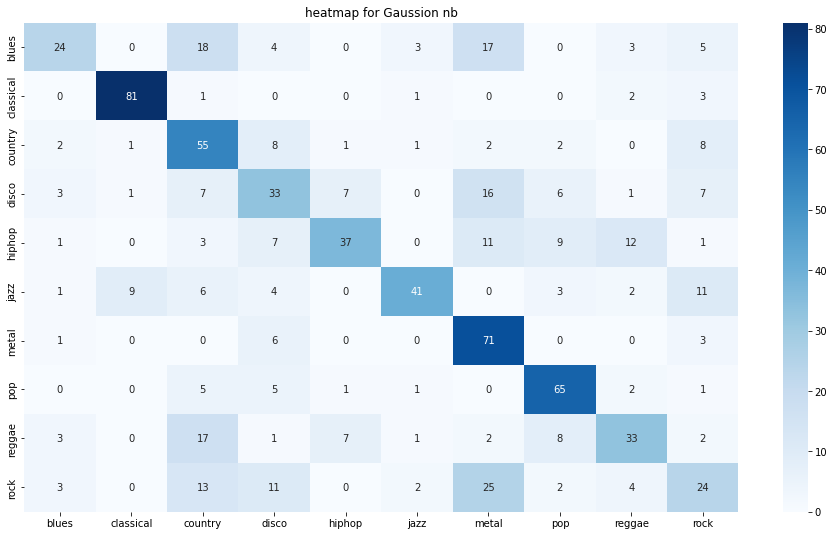

Stochastic Gradient Descent
training accuracy: 78.50%
validation accuracy: 72.00%


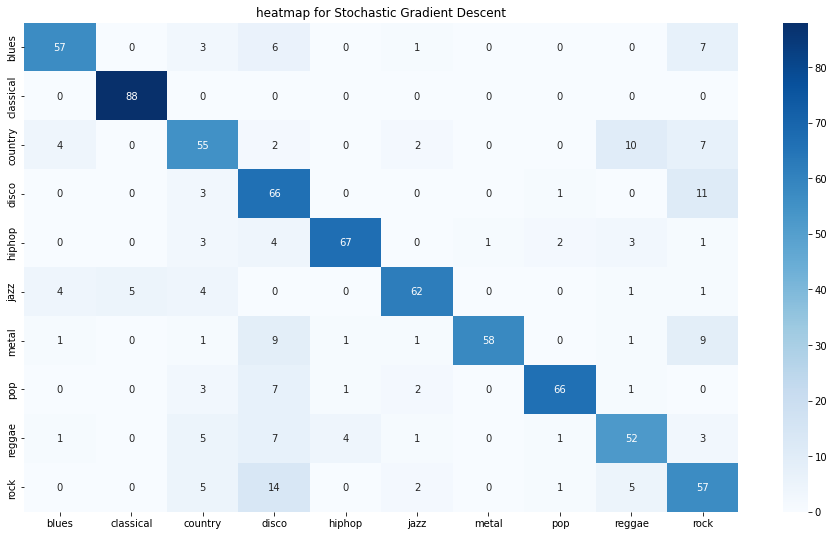

MLP
training accuracy: 99.88%
validation accuracy: 77.00%


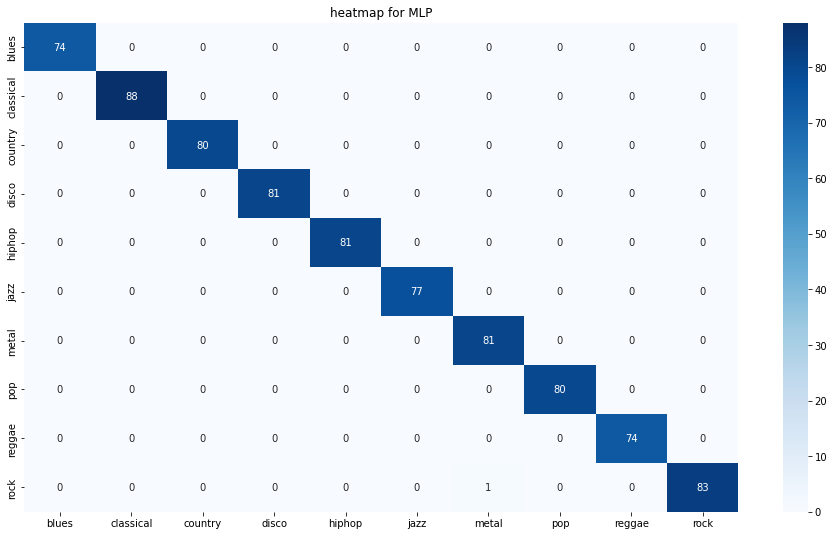

KNN
training accuracy: 64.00%
validation accuracy: 63.00%


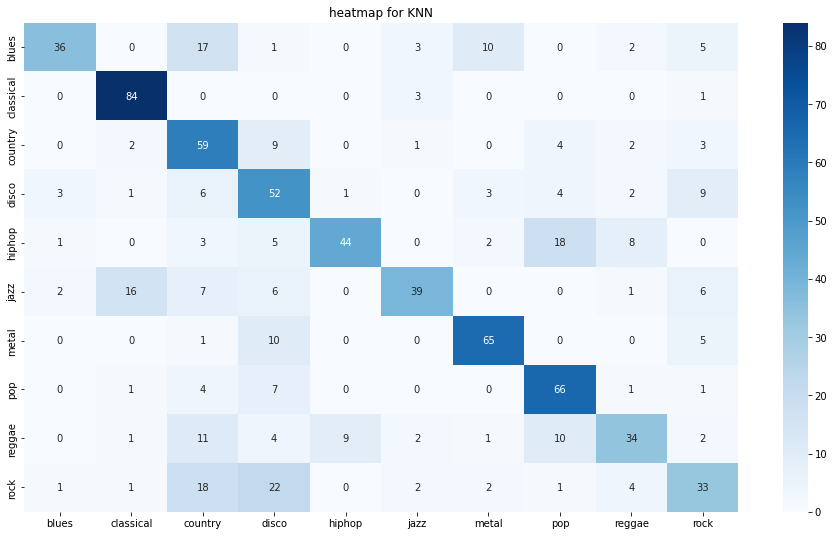

Decission trees
training accuracy: 99.88%
validation accuracy: 51.00%


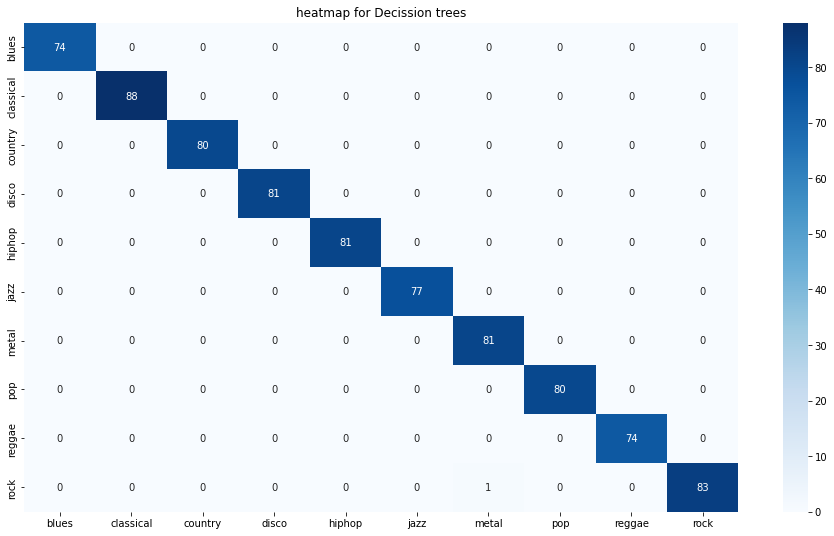

Linear SVM
training accuracy: 97.62%
validation accuracy: 72.00%


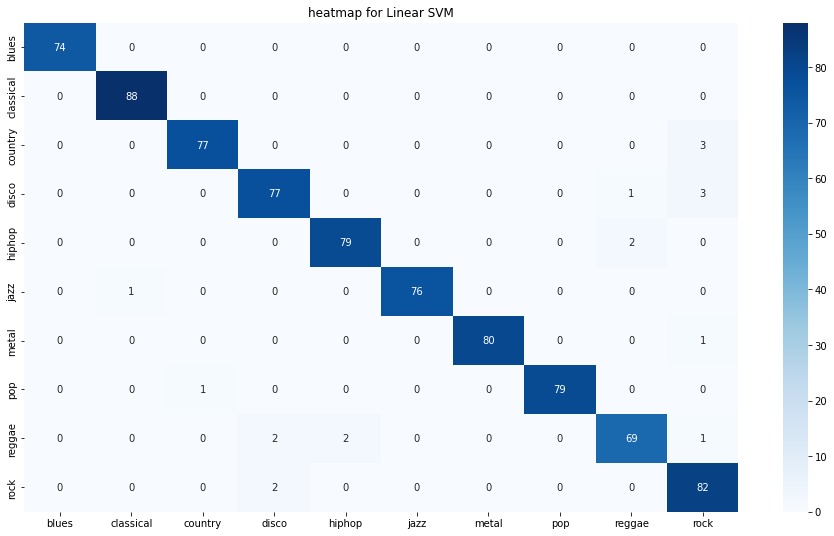

polunomial SVM
training accuracy: 78.00%
validation accuracy: 64.00%


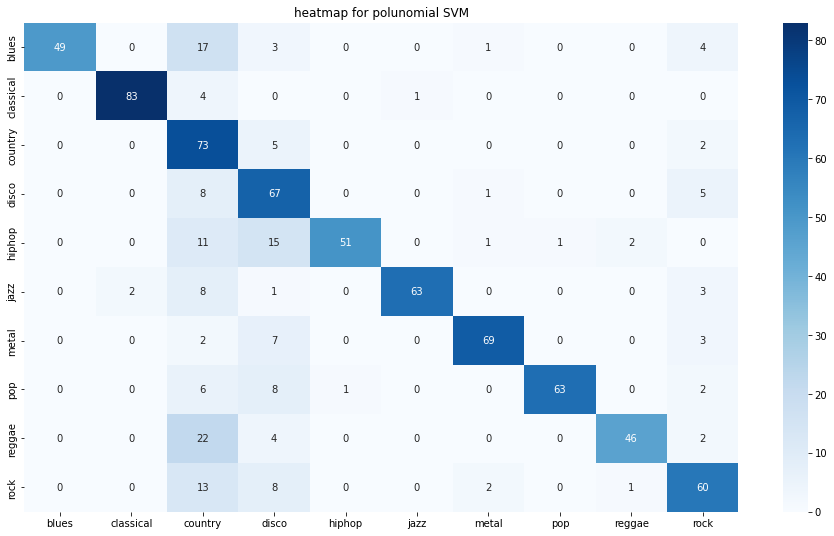

rbf SVM
training accuracy: 88.88%
validation accuracy: 76.00%


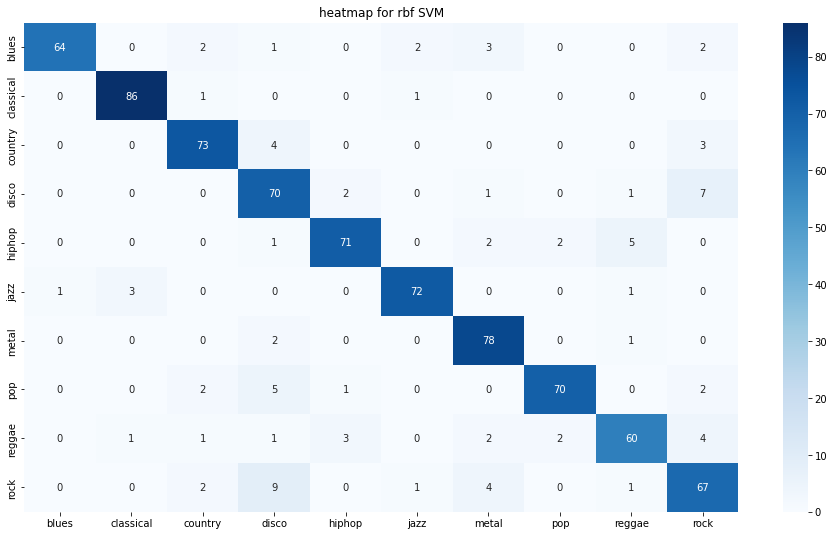

In [13]:
dictionary = {'Gaussion nb': nb, 'Stochastic Gradient Descent':sgd, 'MLP':nn, 
              'KNN':knn, 'Decission trees':tree, 'Linear SVM':linear_svm, 'polunomial SVM':poly_svm, 'rbf SVM': rbf_svm}
for key, value in dictionary.items():
    run_model(value, (X_train, y_train, X_val, y_val), key)
    

Voting
training accuracy: 99.88%
validation accuracy: 77.00%


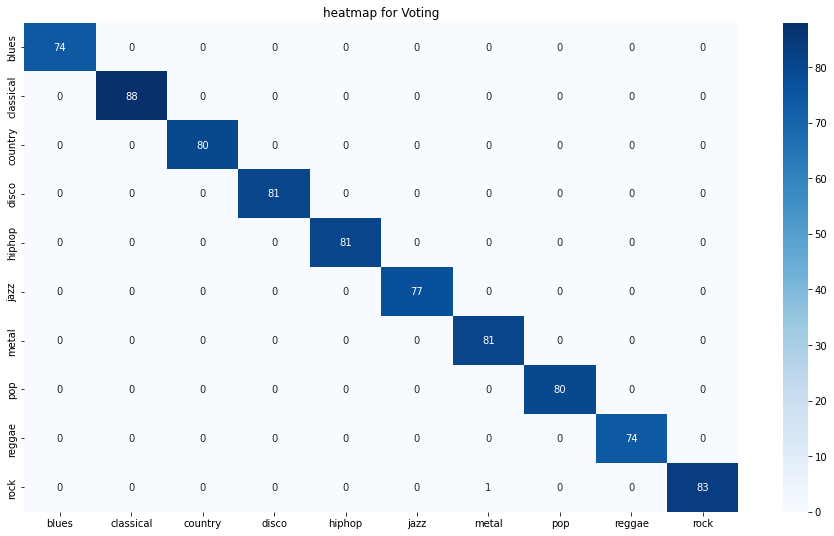

In [14]:
eclf1 = VotingClassifier(estimators=[('classical', nb), ('blues', nn),('country', nn),('disco', nn), ('hiphop', nn),('jazz', nn),('pop', nn),('reggae', nn),('rock', nn),('metal', rbf_svm)], voting='hard')
run_model(eclf1, (X_train, y_train, X_val, y_val), "Voting")

In [18]:
best_model_name='voting'
print('best model: %s'% (best_model_name))
print_accuracy(eclf1, X_test, y_test, txt='testing')

best model: voting
testing accuracy: 76.00%
